In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys

sys.path.append("../")

In [5]:
from src.bayesian_PSL import PlayerComparison, RandomVariablePSL, TeamPSL, EPL_Data

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
EPL_Full_Data = EPL_Data(
    "../SampleData/epl.xlsx", "../SampleData/players.json", "R_storage.npy"
)

# epl = EPL_Full_Data.get_epl()
# epl_player_data = EPL_Full_Data.get_epl_player_data()
# R_storage = EPL_Full_Data.get_r_storage()
# Q_storage = EPL_Full_Data.get_q_storage()
# partidos = EPL_Full_Data.get_partidos()
# tp_ds = EPL_Full_Data.get_transition_prob_dataset()
# player_ids = EPL_Full_Data.get_player_ids()
# player_kdes = EPL_Full_Data.get_player_kdes()

In [8]:
from src.Player2Vec import Player2Vec, EPL_Graph

In [9]:
# model_path = "EPL_Graph_model_3_Weight_Duration_Q.model"
model_path = "./batch_p2v/64_100_500_20/64_100_500_20.model"
p2v_model = Player2Vec(model_path=model_path, epl_data=EPL_Full_Data)

In [10]:
tp_ds = EPL_Full_Data.get_transition_prob_dataset()
tp_ds

,player_id,team_id,team_index,match_id,match_num,lineup_index,duration,gains_prob,losses_prob,shots_prob,...,pass_from_1,pass_from_2,pass_from_3,pass_from_4,pass_from_5,pass_from_6,pass_from_7,pass_from_8,pass_from_9,pass_from_10
0,0.0,3,0,441999,0,0,62.016667,0.060000,0.000000,0.000000,...,0.035714,0.024096,0.028571,0.013333,0.032967,0.038961,0.030769,0.069767,0.034091,0.000
1,0.0,3,0,441999,0,0,62.016667,0.060000,0.000000,0.000000,...,0.035714,0.024096,0.028571,0.013333,0.032967,0.038961,0.030769,0.069767,0.034091,0.000
2,17733.0,3,0,441999,0,0,62.016667,0.035714,0.345238,0.023810,...,0.035714,0.000000,0.000000,0.080000,0.109890,0.168831,0.353846,0.023256,0.034091,0.375
3,19524.0,3,0,441999,0,0,62.016667,0.024096,0.168675,0.012048,...,0.095238,0.060241,0.000000,0.066667,0.032967,0.025974,0.030769,0.000000,0.011364,0.000
4,15943.0,3,0,441999,0,0,62.016667,0.028571,0.485714,0.028571,...,0.071429,0.012048,0.200000,0.013333,0.076923,0.012987,0.276923,0.069767,0.056818,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41920,76227.0,111,1,442378,379,3,93.016667,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
41921,50471.0,111,1,442378,379,3,93.016667,0.000000,1.000000,0.000000,...,1.000000,0.166667,0.333333,0.833333,0.000000,0.500000,0.500000,0.333333,0.500000,1.000
41922,125510.0,111,1,442378,379,3,93.016667,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
41923,0.0,111,1,442378,379,3,93.016667,0.105263,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000


In [11]:
tp_ds.columns

Index(['player_id', 'team_id', 'team_index', 'match_id', 'match_num',
       'lineup_index', 'duration', 'gains_prob', 'losses_prob', 'shots_prob',
       'avg_pass_to_prob', 'avg_pass_from_prob', 'pass_to_0', 'pass_to_1',
       'pass_to_2', 'pass_to_3', 'pass_to_4', 'pass_to_5', 'pass_to_6',
       'pass_to_7', 'pass_to_8', 'pass_to_9', 'pass_to_10', 'pass_from_0',
       'pass_from_1', 'pass_from_2', 'pass_from_3', 'pass_from_4',
       'pass_from_5', 'pass_from_6', 'pass_from_7', 'pass_from_8',
       'pass_from_9', 'pass_from_10'],
      dtype='object')

In [12]:
tp_ds.groupby("player_id")[[
    "gains_prob",
    "losses_prob",
    "shots_prob",
    "avg_pass_to_prob",
    "avg_pass_from_prob",
    "pass_to_0",
    "pass_to_1",
    "pass_to_2",
    "pass_to_3",
    "pass_to_4",
    "pass_to_5",
    "pass_to_6",
    "pass_to_7",
    "pass_to_8",
    "pass_to_9",
    "pass_to_10",
    "pass_from_0",
    "pass_from_1",
    "pass_from_2",
    "pass_from_3",
    "pass_from_4",
    "pass_from_5",
    "pass_from_6",
    "pass_from_7",
    "pass_from_8",
    "pass_from_9",
    "pass_from_10",
]].mean()

,gains_prob,losses_prob,shots_prob,avg_pass_to_prob,avg_pass_from_prob,pass_to_0,pass_to_1,pass_to_2,pass_to_3,pass_to_4,...,pass_from_1,pass_from_2,pass_from_3,pass_from_4,pass_from_5,pass_from_6,pass_from_7,pass_from_8,pass_from_9,pass_from_10
player_id,,,,,,,,,,,,,,,,,,,,,
0.0,0.099695,0.000000,0.000000,0.075743,0.000000,0.000351,0.112999,0.041565,0.034995,0.033219,...,0.046570,0.039033,0.032505,0.036683,0.036000,0.033842,0.035544,0.032438,0.030828,0.026520
3.0,0.037642,0.469918,0.012937,0.047013,0.072109,0.059550,0.037183,0.040183,0.033234,0.054745,...,0.084967,0.073826,0.056803,0.079993,0.075048,0.073878,0.076122,0.049928,0.050854,0.039764
160.0,0.035534,0.651243,0.003993,0.031342,0.059652,0.029111,0.018757,0.040129,0.023322,0.026824,...,0.073318,0.068889,0.073461,0.058581,0.073383,0.073325,0.072450,0.091278,0.096841,0.051842
363.0,0.088056,0.360867,0.009382,0.057250,0.065378,0.046846,0.058970,0.085385,0.059338,0.032902,...,0.074723,0.063825,0.065750,0.035488,0.056946,0.050255,0.049863,0.082154,0.081729,0.031754
1131.0,0.046007,0.544494,0.008614,0.034566,0.077218,0.016753,0.039145,0.031821,0.052607,0.057887,...,0.080645,0.089970,0.063234,0.082472,0.081986,0.115396,0.087922,0.092140,0.098087,0.095660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125510.0,0.017544,0.736842,0.000000,0.008772,0.246128,0.000000,0.000000,0.183333,0.000000,0.016667,...,0.000000,0.011494,0.000000,0.007937,0.016667,0.006667,0.000000,0.008772,0.000000,0.000000
126184.0,0.000000,0.284444,0.004444,0.028283,0.111569,0.004167,0.012500,0.004167,0.000000,0.054167,...,0.027451,0.007692,0.009091,0.112500,0.008889,0.040000,0.039634,0.009302,0.011321,0.000000
132931.0,0.055556,0.585859,0.000000,0.037649,0.235132,0.027778,0.000000,0.027778,0.000000,0.055556,...,0.000000,0.015152,0.000000,0.023810,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000


In [13]:
player_kdes = EPL_Full_Data.get_player_kdes()
player_kdes

{0.0: {'losses_prob': 0,
  'gains_prob': <scipy.stats._kde.gaussian_kde at 0x160c97a30>,
  'shots_prob': 0,
  'avg_pass_to_prob': <scipy.stats._kde.gaussian_kde at 0x160c96800>,
  'avg_pass_from_prob': 0},
 17733.0: {'losses_prob': <scipy.stats._kde.gaussian_kde at 0x160c97460>,
  'gains_prob': <scipy.stats._kde.gaussian_kde at 0x160c97b80>,
  'shots_prob': <scipy.stats._kde.gaussian_kde at 0x160c97be0>,
  'avg_pass_to_prob': <scipy.stats._kde.gaussian_kde at 0x160c97d30>,
  'avg_pass_from_prob': <scipy.stats._kde.gaussian_kde at 0x160c97760>},
 19524.0: {'losses_prob': <scipy.stats._kde.gaussian_kde at 0x160c978b0>,
  'gains_prob': <scipy.stats._kde.gaussian_kde at 0x160c97b50>,
  'shots_prob': <scipy.stats._kde.gaussian_kde at 0x160c977f0>,
  'avg_pass_to_prob': <scipy.stats._kde.gaussian_kde at 0x160c97cd0>,
  'avg_pass_from_prob': <scipy.stats._kde.gaussian_kde at 0x160c96bf0>},
 15943.0: {'losses_prob': <scipy.stats._kde.gaussian_kde at 0x160c97040>,
  'gains_prob': <scipy.stats._

In [14]:
player_kdes.keys()

dict_keys([0.0, 17733.0, 19524.0, 15943.0, 20467.0, 80254.0, 8758.0, 42427.0, 17127.0, 43274.0, 28566.0, 59936.0, 44346.0, 41792.0, 13227.0, 34392.0, 15073.0, 63370.0, 17468.0, 19057.0, 28468.0, 28541.0, 3736.0, 66797.0, 28448.0, 58771.0, 4396.0, 37339.0, 53371.0, 62419.0, 41184.0, 27707.0, 12745.0, 7525.0, 8378.0, 6219.0, 15337.0, 1821.0, 9007.0, 7645.0, 59949.0, 18981.0, 20695.0, 14965.0, 51940.0, 13017.0, 14075.0, 38530.0, 363.0, 50175.0, 2404.0, 43250.0, 83090.0, 12297.0, 18892.0, 27258.0, 4098.0, 1869.0, 37084.0, 4990.0, 39104.0, 15284.0, 11987.0, 1827.0, 17160.0, 42518.0, 1256.0, 37334.0, 81025.0, 11735.0, 40451.0, 38297.0, 19569.0, 19341.0, 5741.0, 18987.0, 19124.0, 41727.0, 15864.0, 15237.0, 19236.0, 40204.0, 41262.0, 28499.0, 18421.0, 44683.0, 39155.0, 42774.0, 19197.0, 15976.0, 3673.0, 57328.0, 101178.0, 17291.0, 38580.0, 11037.0, 17339.0, 18867.0, 37572.0, 20312.0, 14664.0, 49384.0, 17476.0, 7551.0, 15749.0, 20658.0, 20664.0, 28554.0, 17336.0, 42544.0, 42493.0, 42593.0, 4275

In [15]:
import pandas as pd
from scipy import stats

In [16]:
flat_stats = {
    (int(k), d): {
        "mean": v[d].dataset.mean() if not isinstance(v[d], int) else None,
        "std": v[d].dataset.std() if not isinstance(v[d], int) else None,
    }
    for k, v in player_kdes.items()
    for d in v.keys()
}

flat_stats_df = pd.DataFrame(flat_stats).T
flat_stats_df

mean       std
0      losses_prob             None      None
       gains_prob          0.126378  0.103729
       shots_prob              None      None
       avg_pass_to_prob    0.090909       0.0
       avg_pass_from_prob      None      None
...                             ...       ...
106458 losses_prob             None      None
       gains_prob              None      None
       shots_prob              None      None
       avg_pass_to_prob        None      None
       avg_pass_from_prob      None      None

[2610 rows x 2 columns]

In [17]:
flat_stats_df.columns

# Index(['mean', 'std'], dtype='object')

Index(['mean', 'std'], dtype='object')

In [18]:
flat_stats_df.index

"""
MultiIndex([(     0,        'losses_prob'),
            (     0,         'gains_prob'),
            (     0,         'shots_prob'),
            (     0,   'avg_pass_to_prob'),
            (     0, 'avg_pass_from_prob'),
            ( 17733,        'losses_prob'),
            ( 17733,         'gains_prob'),
            ( 17733,         'shots_prob'),
            ( 17733,   'avg_pass_to_prob'),
            ( 17733, 'avg_pass_from_prob'),
            ...
"""

"\nMultiIndex([(     0,        'losses_prob'),\n            (     0,         'gains_prob'),\n            (     0,         'shots_prob'),\n            (     0,   'avg_pass_to_prob'),\n            (     0, 'avg_pass_from_prob'),\n            ( 17733,        'losses_prob'),\n            ( 17733,         'gains_prob'),\n            ( 17733,         'shots_prob'),\n            ( 17733,   'avg_pass_to_prob'),\n            ( 17733, 'avg_pass_from_prob'),\n            ...\n"

In [19]:
import numpy as np

In [20]:
vals_arr = np.array(flat_stats_df.values.flatten(), dtype=np.float64)
np.nanmean(vals_arr), np.nanstd(vals_arr), np.nansum(vals_arr)

(0.14566044795351385, 0.16106526257495515, 643.5278590586242)

In [21]:
player_ids = EPL_Full_Data.get_player_ids()
player_ids.astype(int)

array([     0,  17733,  19524,  15943,  20467,  80254,   8758,  42427,
        17127,  43274,  28566,  59936,  44346,  41792,  13227,  34392,
        15073,  63370,  17468,  19057,  28468,  28541,   3736,  66797,
        28448,  58771,   4396,  37339,  53371,  62419,  41184,  27707,
        12745,   7525,   8378,   6219,  15337,   1821,   9007,   7645,
        59949,  18981,  20695,  14965,  51940,  13017,  14075,  38530,
          363,  50175,   2404,  43250,  83090,  12297,  18892,  27258,
         4098,   1869,  37084,   4990,  39104,  15284,  11987,   1827,
        17160,  42518,   1256,  37334,  81025,  11735,  40451,  38297,
        19569,  19341,   5741,  18987,  19124,  41727,  15864,  15237,
        19236,  40204,  41262,  28499,  18421,  44683,  39155,  42774,
        19197,  15976,   3673,  57328, 101178,  17291,  38580,  11037,
        17339,  18867,  37572,  20312,  14664,  49384,  17476,   7551,
        15749,  20658,  20664,  28554,  17336,  42544,  42493,  42593,
      

In [22]:
from tqdm import tqdm

In [23]:
flat_stats_df.loc[(17733, "losses_prob")]

mean    0.486928
std     0.239423
Name: (17733, losses_prob), dtype: object

In [24]:
flat_stats_df

mean       std
0      losses_prob             None      None
       gains_prob          0.126378  0.103729
       shots_prob              None      None
       avg_pass_to_prob    0.090909       0.0
       avg_pass_from_prob      None      None
...                             ...       ...
106458 losses_prob             None      None
       gains_prob              None      None
       shots_prob              None      None
       avg_pass_to_prob        None      None
       avg_pass_from_prob      None      None

[2610 rows x 2 columns]

In [25]:
emb_df = pd.DataFrame(
    {
        player_id: {
            "player_id": player_id,
            **{
                f"emb_{i}": (p2v_model.model.wv.get_vector(str(player_id))[i])
                for i in range(3)
            },
        }
        for i, player_id in tqdm(enumerate(player_ids.astype(int)))
        if player_id in p2v_model.model.wv.index_to_key
    }
)

522it [00:31, 16.63it/s]


In [26]:
dist_ds = []

for i, player_id in tqdm(enumerate(player_ids.astype(int))):
    if str(player_id) not in p2v_model.model.wv.index_to_key:
        continue
    emb = p2v_model.model.wv.get_vector(str(player_id))

    dist_ds.append(
        {
            "player_id": player_id,
            **{f"emb_{i}": emb[i] for i in range(len(emb))},
            "losses_prob_mean": flat_stats_df.loc[(player_id, "losses_prob")]["mean"],
            "gains_prob_mean": flat_stats_df.loc[(player_id, "gains_prob")]["mean"],
            "shots_prob_mean": flat_stats_df.loc[(player_id, "shots_prob")]["mean"],
            "avg_pass_to_prob_mean": flat_stats_df.loc[(player_id, "avg_pass_to_prob")][
                "mean"
            ],
            "avg_pass_from_prob_mean": flat_stats_df.loc[
                (player_id, "avg_pass_from_prob")
            ]["mean"],
            "losses_prob_std": flat_stats_df.loc[(player_id, "losses_prob")]["std"],
            "gains_prob_std": flat_stats_df.loc[(player_id, "gains_prob")]["std"],
            "shots_prob_std": flat_stats_df.loc[(player_id, "shots_prob")]["std"],
            "avg_pass_to_prob_std": flat_stats_df.loc[(player_id, "avg_pass_to_prob")][
                "std"
            ],
            "avg_pass_from_prob_std": flat_stats_df.loc[
                (player_id, "avg_pass_from_prob")
            ]["std"],
            # **{
            #     f"{d}_{s}_mean": flat_stats_df.loc[(player_id, s)]["mean"]
            #     for d, s in flat_stats_df.index
            # },
            # **{
            #     f"{d}_{s}_std": flat_stats_df.loc[(player_id, s)]["std"]
            #     for d, s in flat_stats_df.index
            # },
            # "name": EPL_Full_Data.epl_player_data.get_player_name(int(player_id)),
            # "position": EPL_Full_Data.epl_player_data.get_player_position(
            #     int(player_id)
            # ),
            # "team": EPL_Full_Data.get_player_team(int(player_id)),
        }
    )

dist_ds

522it [00:00, 1335.49it/s]


[{'player_id': 17733,
  'emb_0': 0.13588516,
  'emb_1': 0.044513285,
  'emb_2': 0.03324205,
  'emb_3': 0.09509353,
  'emb_4': 0.44434497,
  'emb_5': -0.35884076,
  'emb_6': -0.9601509,
  'emb_7': 0.26129767,
  'emb_8': -0.17989273,
  'emb_9': 0.3812177,
  'emb_10': -0.36103636,
  'emb_11': 0.7839529,
  'emb_12': -0.68098915,
  'emb_13': 0.7672528,
  'emb_14': 0.6919322,
  'emb_15': 0.6006395,
  'emb_16': -0.13002054,
  'emb_17': -0.14253587,
  'emb_18': -0.068385676,
  'emb_19': 0.31985188,
  'emb_20': 1.0482206,
  'emb_21': 0.6840022,
  'emb_22': -0.12573236,
  'emb_23': -0.029689064,
  'emb_24': 0.60786825,
  'emb_25': 0.8377878,
  'emb_26': -1.0647988,
  'emb_27': 0.12486878,
  'emb_28': 0.5817446,
  'emb_29': 0.61417955,
  'emb_30': -0.056334265,
  'emb_31': -0.3763046,
  'emb_32': -0.46986198,
  'emb_33': 0.06681229,
  'emb_34': 0.29719272,
  'emb_35': -0.7072368,
  'emb_36': -0.27284077,
  'emb_37': 0.27482852,
  'emb_38': -0.26813313,
  'emb_39': -0.5229805,
  'emb_40': -0.41184

In [27]:
dist_df = pd.DataFrame(dist_ds)
dist_df

,player_id,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,losses_prob_mean,gains_prob_mean,shots_prob_mean,avg_pass_to_prob_mean,avg_pass_from_prob_mean,losses_prob_std,gains_prob_std,shots_prob_std,avg_pass_to_prob_std,avg_pass_from_prob_std
0,17733,0.135885,0.044513,0.033242,0.095094,0.444345,-0.358841,-0.960151,0.261298,-0.179893,...,0.486928,0.133518,0.051081,0.052944,0.088055,0.239423,0.109772,0.042171,0.015301,0.118070
1,19524,0.463327,-0.257697,0.220198,0.096608,0.314982,-0.302348,-0.189943,0.162664,-0.219471,...,0.487109,0.130930,0.057008,0.055636,0.077144,0.257845,0.088766,0.043063,0.018958,0.094256
2,15943,0.998593,-0.608009,0.307333,0.073796,0.466627,-0.261373,-0.226598,0.104531,-0.436237,...,0.525105,0.101915,0.054495,0.053427,0.076179,0.254758,0.061212,0.030676,0.016980,0.119774
3,20467,-0.141446,-0.090175,0.755945,-0.004525,0.576643,-0.415878,-0.297215,0.264990,-0.472599,...,0.570968,0.124730,0.087910,0.057513,0.139118,0.306205,0.092355,0.075812,0.019240,0.159023
4,80254,0.259583,0.259636,1.320031,0.332283,0.814900,-0.477634,-0.992131,-0.153897,0.086449,...,0.448669,0.112043,0.054212,0.059172,0.072023,0.243302,0.092971,0.025410,0.018087,0.080233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,103912,0.359715,-0.281797,1.138141,0.631549,0.006164,-1.204711,-0.579536,0.441424,-1.612115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517,92790,0.350934,-0.809609,0.864936,-1.138921,0.649483,-1.318910,0.176498,0.393888,-0.675348,...,0.557500,NaN,NaN,0.040227,NaN,0.217120,NaN,NaN,0.019738,NaN
518,94738,0.060540,-0.972368,0.843514,0.550636,0.356616,-1.838677,-0.455977,0.322120,-1.157824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,76227,1.446831,-0.529168,1.051103,0.929702,0.620843,-1.156825,-0.260348,0.940717,-0.429798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
dist_df = dist_df.fillna(0)
dist_df

,player_id,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,losses_prob_mean,gains_prob_mean,shots_prob_mean,avg_pass_to_prob_mean,avg_pass_from_prob_mean,losses_prob_std,gains_prob_std,shots_prob_std,avg_pass_to_prob_std,avg_pass_from_prob_std
0,17733,0.135885,0.044513,0.033242,0.095094,0.444345,-0.358841,-0.960151,0.261298,-0.179893,...,0.486928,0.133518,0.051081,0.052944,0.088055,0.239423,0.109772,0.042171,0.015301,0.118070
1,19524,0.463327,-0.257697,0.220198,0.096608,0.314982,-0.302348,-0.189943,0.162664,-0.219471,...,0.487109,0.130930,0.057008,0.055636,0.077144,0.257845,0.088766,0.043063,0.018958,0.094256
2,15943,0.998593,-0.608009,0.307333,0.073796,0.466627,-0.261373,-0.226598,0.104531,-0.436237,...,0.525105,0.101915,0.054495,0.053427,0.076179,0.254758,0.061212,0.030676,0.016980,0.119774
3,20467,-0.141446,-0.090175,0.755945,-0.004525,0.576643,-0.415878,-0.297215,0.264990,-0.472599,...,0.570968,0.124730,0.087910,0.057513,0.139118,0.306205,0.092355,0.075812,0.019240,0.159023
4,80254,0.259583,0.259636,1.320031,0.332283,0.814900,-0.477634,-0.992131,-0.153897,0.086449,...,0.448669,0.112043,0.054212,0.059172,0.072023,0.243302,0.092971,0.025410,0.018087,0.080233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,103912,0.359715,-0.281797,1.138141,0.631549,0.006164,-1.204711,-0.579536,0.441424,-1.612115,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
517,92790,0.350934,-0.809609,0.864936,-1.138921,0.649483,-1.318910,0.176498,0.393888,-0.675348,...,0.557500,0.000000,0.000000,0.040227,0.000000,0.217120,0.000000,0.000000,0.019738,0.000000
518,94738,0.060540,-0.972368,0.843514,0.550636,0.356616,-1.838677,-0.455977,0.322120,-1.157824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
519,76227,1.446831,-0.529168,1.051103,0.929702,0.620843,-1.156825,-0.260348,0.940717,-0.429798,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
import matplotlib.pyplot as plt

In [30]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split

class p2v_dist_model(nn.Module):
    def __init__(self, input_size=3, output_size=10):
        super(p2v_dist_model, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [41]:

# Plot the model

# !pip install torchviz
import torchviz
from torchviz import make_dot

x = torch.randn(1, 64)
model = p2v_dist_model(input_size=64)
y = model(x)

# Save the plot as pdf
make_dot(y, params=dict(model.named_parameters())).render(
    "../recursos_pdf/graficos/p2v_dist_model", format="pdf"
)

make_dot(y, params=dict(model.named_parameters())).render(
    "../recursos_pdf/graficos/p2v_dist_model", format="png"
)

'../recursos_pdf/graficos/p2v_dist_model.png'

In [56]:
# !pip install torchview
from torchview import draw_graph

model_graph = draw_graph(
    model,
    x,
    graph_name="p2v_dist_model",
    graph_dir="LR",
    save_graph=True,
    filename="../recursos_pdf/graficos/p2v_dist_model_H"
)

graph = model_graph.visual_graph

# Save the plot as pdf
graph.render("../recursos_pdf/graficos/p2v_dist_model_H", format="pdf")

'../recursos_pdf/graficos/p2v_dist_model_H.pdf'

In [31]:
class JSD(nn.Module):
    """ Jenson-Shannon Divergence Loss Function
    """
    def __init__(self):
        super(JSD, self).__init__()
        self.kl = nn.KLDivLoss(reduction="batchmean", log_target=True)

    def forward(self, p: torch.tensor, q: torch.tensor):
        p, q = p.view(-1, p.size(-1)).log_softmax(-1), q.view(
            -1, q.size(-1)
        ).log_softmax(-1)
        m = 0.5 * (p + q)
        return 0.5 * (self.kl(m, p) + self.kl(m, q))


# output_cols
"""
[
   0 'losses_prob_mean',
   1 'gains_prob_mean',
   2 'shots_prob_mean',
   3 'avg_pass_to_prob_mean',
   4 'avg_pass_from_prob_mean',
   5 'losses_prob_std',
   6 'gains_prob_std',
   7 'shots_prob_std',
   8 'avg_pass_to_prob_std',
   9 'avg_pass_from_prob_std'
]
"""

# 0, 5 -> losses mean, std
# 1, 6 -> gains mean, std
# 2, 7 -> shots mean, std
# 3, 8 -> avg pass to mean, std
# 4, 9 -> avg pass from mean, std

# Custom loss function to calculate the Jensen-Shannon Divergence between the predicted and target distributions for the 5 features
# Ponderation of the divergence of the mean and std of the 5 features


class custom_loss(nn.Module):
    def __init__(self):
        super(custom_loss, self).__init__()
        self.jsd = JSD()

    def forward(self, y_pred, y_true):
        loss = 0
        for i in range(5):
            loss += self.jsd(y_pred[:, i], y_true[:, i]) + self.jsd(
                y_pred[:, i + 5], y_true[:, i + 5]
            )
        return loss

In [32]:
input_cols = [col for col in dist_df.columns if "emb" in col]
output_cols = [col for col in dist_df.columns if "prob" in col]

X = torch.tensor(dist_df[input_cols].values, dtype=torch.float32)
y = torch.tensor(
    dist_df[[col for col in dist_df.columns if "prob" in col]].values,
    dtype=torch.float32,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [159]:
!pip install wandb

python(93656) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 2.9 MB/s eta 0:00:00a 0:00:01


In [33]:
import wandb
wandb.login(key="5a7fe6c819f2c71810e3e0addddfd660c3d71300")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ignacio-pardo (pardo). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /Users/nacho/.netrc


True

In [34]:
model = p2v_dist_model(input_size=len(input_cols), output_size=10)
criterion = custom_loss()

# optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
#     optimizer, mode="min", factor=0.1, patience=10, verbose=True
# )

lr = 0.01
momentum = 0.9
weight_decay = 0.0005

optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.05)

early_stopping = True
n_epochs = 10000
iterator = tqdm(range(n_epochs))

train_losses = []
test_losses = []

wandb.init(
    project="td8",
    name=f"p2v_dist_model_{len(input_cols)}_{n_epochs}_{lr}_{scheduler.__class__.__name__}",
    config={
        "p2v dims": len(input_cols),
        "n_epochs": n_epochs,
        "early_stopping": early_stopping,
        "optimizer": f"{optimizer.__class__.__name__}",
        "lr": 0.01,
        "momentum": momentum,
        "weight_decay": weight_decay,
        "scheduler": f"{scheduler.__class__.__name__}",
        **{
            f"scheduler_{k}": v
            for k, v in scheduler.__dict__.items()
            if not k.startswith("_")
        },
    },
)

for epoch in iterator:
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    if scheduler is not None:
        scheduler.step(loss)

    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        loss = criterion(y_pred, y_test)
        test_losses.append(loss.item())

        # early stopping
        if early_stopping and len(test_losses) > 10 and test_losses[-10] < test_losses[-1]:
            break

    iterator.set_postfix(loss=loss.item())

    wandb.log({"train_loss": train_losses[-1], "test_loss": test_losses[-1]})

wandb.finish()

  0%|          | 0/10000 [00:00<?, ?it/s]

 86%|████████▋ | 8631/10000 [01:13<00:11, 117.15it/s, loss=0.00639]


test_loss,█▇▅▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▇▆▆▆▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_loss,0.00639
train_loss,0.00319


(8629, 0.006385950371623039)

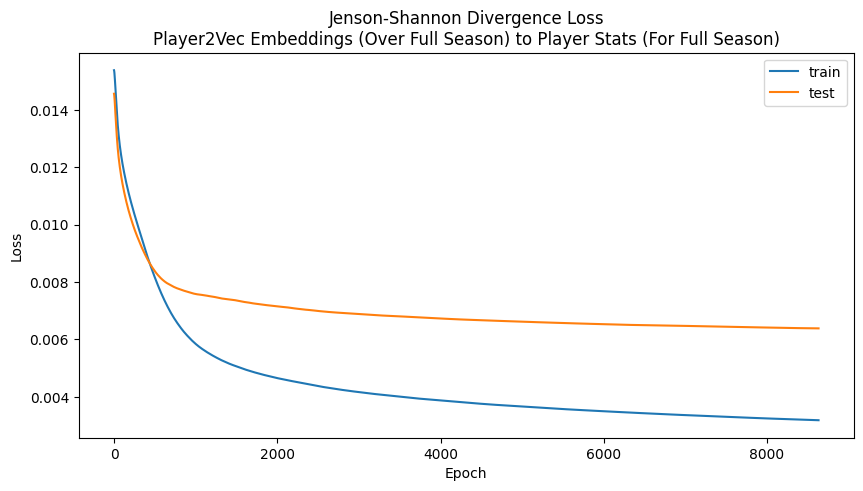

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(train_losses, label="train")
ax.plot(test_losses, label="test")

ax.legend()

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax.set_title(
    "Jenson-Shannon Divergence Loss\nPlayer2Vec Embeddings (Over Full Season) to Player Stats (For Full Season)"
)

np.argmin(test_losses), test_losses[np.argmin(test_losses)]